In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
churn_data_zero = pd.read_csv('data/churn.csv')
churn_data = churn_data_zero.copy()
churn_data = churn_data.drop('RowNumber', axis=1)
#churn_data.describe()
#churn_data.info()

In [24]:
fig = go.Figure()
churn_data_active_member = churn_data['Exited'].value_counts()
fig.add_trace(go.Pie(values=churn_data_active_member, labels=churn_data_active_member.index))
fig.show()


In [3]:
fig = go.Figure()
s1 = churn_data.groupby(by='NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])

s1['NumOfProducts'] = s1.index
s1['rest'] = s1['count'] - s1['sum']
values = s1['sum']
values2 = s1['rest']
labels = tuple(range(1,5))

fig = go.Figure()
fig.add_trace(go.Bar(x = labels, y = values))
fig.add_trace(go.Bar(x = labels, y = values2))
fig.update_layout(barmode='stack')
fig.show()


In [25]:
mask = churn_data['Balance'] > 2500
churn_data_balance = churn_data[mask]
fig = go.Figure(data=[go.Histogram(x=churn_data_balance['Balance'])])
fig.show()

In [84]:
mask1 = churn_data['Exited']  == 1
mask0 = churn_data['Exited']  == 0
fig = go.Figure()
fig.add_trace(go.Box(y=churn_data[mask1]['Balance'], name='Ушедшие клиенты'))
fig.add_trace(go.Box(y=churn_data[mask0]['Balance'], name='Лояльные клиенты'))
fig.show()

In [81]:
mask1 = churn_data['Exited']  == 1
mask0 = churn_data['Exited']  == 0
fig = go.Figure()
fig.add_trace(go.Box(x=churn_data[mask1]['Age'], name='Ушедшие клиенты'))
fig.add_trace(go.Box(x=churn_data[mask0]['Age'], name='Лояльные клиенты'))
fig.show()

In [87]:
mask1 = churn_data['Exited']  == 1
mask0 = churn_data['Exited']  == 0
fig = go.Figure()
fig.add_trace(go.Histogram(x=churn_data[mask1]['Age'], opacity=0.75, name='Ушедшие клиенты'))
fig.add_trace(go.Histogram(x=churn_data[mask0]['Age'], opacity=0.45, name='Лояльные клиенты'))
fig.update_layout(barmode='overlay',)
fig.show()

In [99]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1

fig = go.Figure()
fig.add_trace(go.Scatter(x= churn_data['CreditScore'], y= churn_data['EstimatedSalary']))
fig.show()

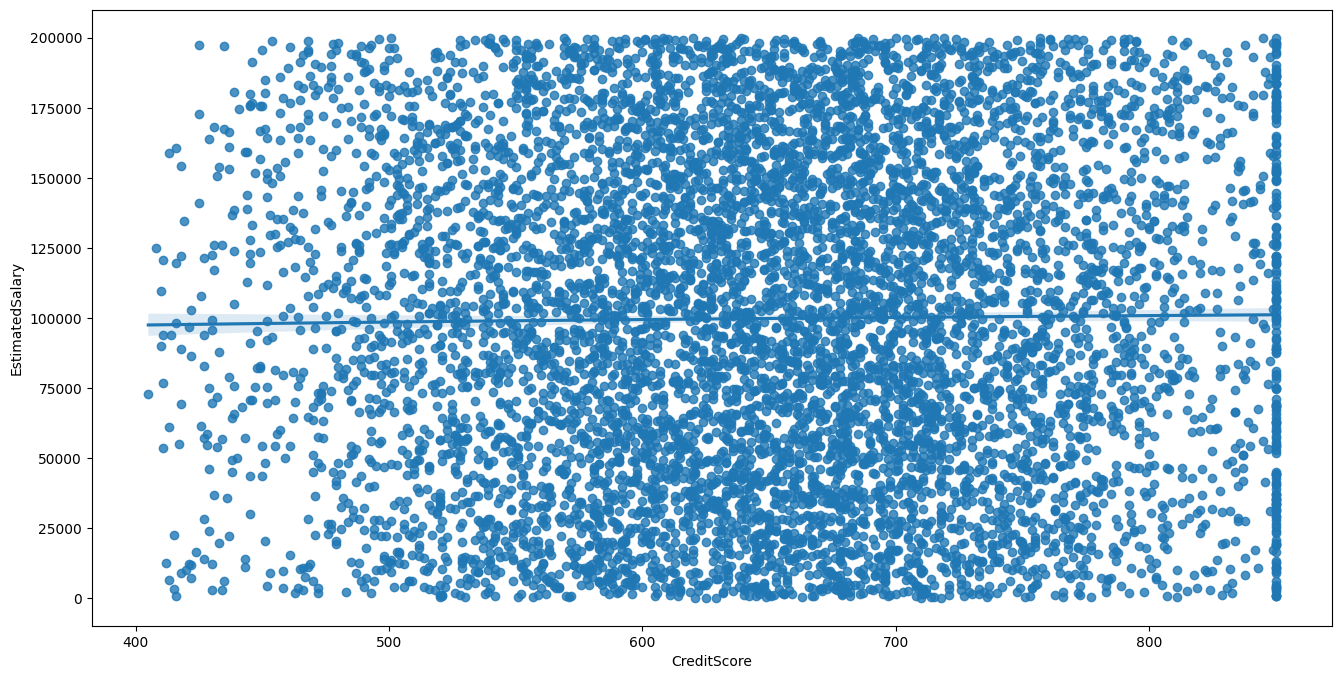

In [110]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 0
fig = plt.figure(figsize=(16, 8))
boxplot = sns.regplot(x="CreditScore", y="EstimatedSalary", logx=True, data=churn_data[mask])


In [36]:
churn_data.groupby('Geography').mean()
mask=churn_data['Exited']==1
churn_data_country = churn_data.groupby('Geography')['Exited'].agg(['mean', 'sum', 'count'])
churn_data_country['Geography'] = churn_data_country.index
churn_data_country

C:\Users\Людмила\AppData\Local\Temp\ipykernel_18548\3927479902.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,mean,sum,count,Geography
Geography,,,,
France,0.161548,810,5014,France
Germany,0.324432,814,2509,Germany
Spain,0.166734,413,2477,Spain


In [37]:
#строим график
fig = px.choropleth(
    data_frame=churn_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] but received: country